<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** Duong Ngoc Phuong Trang

**Student ID:** 223990468

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations informed by your work.

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

#### NOTE: You can create multiple Markdown and Code cells to present your work.

**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

This section can be used for:
* Preparing (cleansing) for further processing.
* Finding meaningful patterns in the data set as relevant to the case study and the problem.
* Visualising variables related to the problem.

This section may include:
* Selection of relevant data features.
* Selection of an attribute as label.
* Approach to handling missing values (if any).
* Transformations on the dataset (can be any necessary modifications to the data - string value or categorial variables to numerical, any numeric normalizations, or any type conversions such as nominal to numeric and the similar).
* Univariate/Bivariate/Multivariate analyses (e.g., using visualizations etc.).

Make sure your visualizations are accompanied by relevant discussions of the insights the analyses and visualizations will/should lead to.

In [1]:
# Load requires libraries
import pandas as pd
import numpy as np
# Import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load data from Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# load dataset
Ass1 = pd.read_csv('/VayuAir (1).csv')

# explore the dataset
print(Ass1)

       Module_id  Response_ID             Satisfaction  Age  Gender  \
0          20461        27353                satisfied   29    Male   
1          39192         6970                satisfied   55  Female   
2          82556        60407  neutral or dissatisfied   52    Male   
3          55565        60678                satisfied   55    Male   
4          92507        20042  neutral or dissatisfied   22  Female   
...          ...          ...                      ...  ...     ...   
11001      33271         6694  neutral or dissatisfied   16    Male   
11002      22986       127638  neutral or dissatisfied    8    Male   
11003      70648        64671                satisfied   40    Male   
11004      26338         3449  neutral or dissatisfied   34    Male   
11005      96093        51579                satisfied   20  Female   

      Customer type Travel type Ticket type  Flight distance  \
0             Loyal    Business    Business              697   
1             Loyal

In [4]:
#explore the dataset
print(Ass1)

print('Sample size:', Ass1.shape[0])
print('Number of columns:', Ass1.shape[1])

       Module_id  Response_ID             Satisfaction  Age  Gender  \
0          20461        27353                satisfied   29    Male   
1          39192         6970                satisfied   55  Female   
2          82556        60407  neutral or dissatisfied   52    Male   
3          55565        60678                satisfied   55    Male   
4          92507        20042  neutral or dissatisfied   22  Female   
...          ...          ...                      ...  ...     ...   
11001      33271         6694  neutral or dissatisfied   16    Male   
11002      22986       127638  neutral or dissatisfied    8    Male   
11003      70648        64671                satisfied   40    Male   
11004      26338         3449  neutral or dissatisfied   34    Male   
11005      96093        51579                satisfied   20  Female   

      Customer type Travel type Ticket type  Flight distance  \
0             Loyal    Business    Business              697   
1             Loyal

In [5]:
print(Ass1.info())
print(Ass1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Module_id                    11006 non-null  int64  
 1   Response_ID                  11006 non-null  int64  
 2   Satisfaction                 11006 non-null  object 
 3   Age                          11006 non-null  int64  
 4   Gender                       11006 non-null  object 
 5   Customer type                11006 non-null  object 
 6   Travel type                  11006 non-null  object 
 7   Ticket type                  11006 non-null  object 
 8   Flight distance              11006 non-null  int64  
 9   Departure delay in minutes   11006 non-null  int64  
 10  Arrival delay in minutes     10953 non-null  float64
 11  Flight schedule suitability  11006 non-null  int64  
 12  Booking service              11006 non-null  int64  
 13  Online checkin  

In [6]:
#Count missing data
for i in Ass1.iloc[:,0:25]:
  miss=Ass1[i].isna().sum()
  print(i,'missing: ', miss)

Module_id missing:  0
Response_ID missing:  0
Satisfaction missing:  0
Age missing:  0
Gender missing:  0
Customer type missing:  0
Travel type missing:  0
Ticket type missing:  0
Flight distance missing:  0
Departure delay in minutes missing:  0
Arrival delay in minutes missing:  53
Flight schedule suitability missing:  0
Booking service missing:  0
Online checkin missing:  0
Airport checkin missing:  0
Baggage handling missing:  0
Boarding service missing:  0
Cabin crew service missing:  0
Seat comfort missing:  0
Food and drink missing:  0
Inflight entertainment missing:  0
Inflight wifi missing:  0
Leg room missing:  0
Inflight amenities quality missing:  0
Cleanliness missing:  0


In [7]:
Ass1.drop(columns=['Module_id','Response_ID'], inplace=True)

In [9]:
#descriptive stats for numerical variables
Ass1.describe()

,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,Airport checkin,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
count,11006.000,11006.000,11006.000,10953.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000
mean,39.166,1192.901,14.955,15.313,3.060,2.752,3.251,3.304,3.622,2.967,3.373,3.440,3.193,3.348,2.697,3.339,3.616,3.286
std,15.058,997.654,40.395,40.858,1.530,1.401,1.351,1.273,1.189,1.268,1.288,1.326,1.336,1.348,1.329,1.330,1.194,1.326
min,7.000,67.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,27.000,413.000,0.000,0.000,2.000,2.000,2.000,3.000,3.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000
50%,40.000,852.500,0.000,0.000,3.000,3.000,3.000,3.000,4.000,3.000,4.000,4.000,3.000,4.000,3.000,4.000,4.000,3.000
75%,50.000,1744.000,12.000,13.000,4.000,4.000,4.000,4.000,5.000,4.000,4.000,5.000,4.000,4.000,4.000,4.000,5.000,4.000
max,85.000,4963.000,1017.000,1011.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000


In [10]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#summarise categorical columns as well
data_types =['object', 'float', 'int']
Ass1.describe(include=data_types)

,Satisfaction,Age,Gender,Customer type,Travel type,Ticket type,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,...,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
count,11006,11006.000,11006,11006,11006,11006,11006.000,11006.000,10953.000,11006.000,...,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000,11006.000
unique,2,NaN,2,2,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neutral or dissatisfied,NaN,Female,Loyal,Business,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6230,NaN,5628,8984,7590,5231,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.166,NaN,NaN,NaN,NaN,1192.901,14.955,15.313,3.060,...,3.622,2.967,3.373,3.440,3.193,3.348,2.697,3.339,3.616,3.286
std,NaN,15.058,NaN,NaN,NaN,NaN,997.654,40.395,40.858,1.530,...,1.189,1.268,1.288,1.326,1.336,1.348,1.329,1.330,1.194,1.326
min,NaN,7.000,NaN,NaN,NaN,NaN,67.000,0.000,0.000,0.000,...,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,NaN,27.000,NaN,NaN,NaN,NaN,413.000,0.000,0.000,2.000,...,3.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000
50%,NaN,40.000,NaN,NaN,NaN,NaN,852.500,0.000,0.000,3.000,...,4.000,3.000,4.000,4.000,3.000,4.000,3.000,4.000,4.000,3.000
75%,NaN,50.000,NaN,NaN,NaN,NaN,1744.000,12.000,13.000,4.000,...,5.000,4.000,4.000,5.000,4.000,4.000,4.000,4.000,5.000,4.000


In [11]:
#describe a numeric variable
Ass1['Satisfaction'].describe()

count                       11006
unique                          2
top       neutral or dissatisfied
freq                         6230
Name: Satisfaction, dtype: object

In [12]:
# Missing variable
Ass1.replace(" ", pd.NA, inplace=True)

#Fill in missing numerical data with team
Ass1['Arrival delay in minutes'].fillna(Ass1['Arrival delay in minutes'].mean(),inplace=True)

In [13]:
print(Ass1.isnull().sum().sort_values(ascending=0))

Satisfaction                   0
Airport checkin                0
Inflight amenities quality     0
Leg room                       0
Inflight wifi                  0
Inflight entertainment         0
Food and drink                 0
Seat comfort                   0
Cabin crew service             0
Boarding service               0
Baggage handling               0
Online checkin                 0
Age                            0
Booking service                0
Flight schedule suitability    0
Arrival delay in minutes       0
Departure delay in minutes     0
Flight distance                0
Ticket type                    0
Travel type                    0
Customer type                  0
Gender                         0
Cleanliness                    0
dtype: int64


In [14]:
#convert categorical variables to numeric
# Define the custom mapping
Satisfaction_mapping = {
    'satisfied': 1,
    'neutral or dissatisfied': 0
}
# Convert the categories to numerical values using replace()
Ass1['satis.new1'] = Ass1['Satisfaction'].replace(Satisfaction_mapping)

In [15]:
Gender_mapping = {
    'Male': 1,
    'Female': 0
}
# Convert the categories to numerical values using replace()
Ass1['gender.new1'] = Ass1['Gender'].replace(Gender_mapping)

In [16]:
CustomerType_mapping = {
    'Loyal': 1,
    'Discontinued': 0
}
# Convert the categories to numerical values using replace()
Ass1['cusType.new1'] = Ass1['Customer type'].replace(CustomerType_mapping)

In [17]:
TravelType_mapping = {
    'Business': 1,
    'Personal': 0
}
# Convert the categories to numerical values using replace()
Ass1['travelType.new1'] = Ass1['Travel type'].replace(TravelType_mapping)

In [18]:
TicketType_mapping = {
    'Economy': 2,
    'Business': 0,
    'Economy Plus': 1
}
# Convert the categories to numerical values using replace()
Ass1['ticType.new'] = Ass1['Ticket type'].replace(TicketType_mapping)

In [19]:
Ass1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Satisfaction                 11006 non-null  object 
 1   Age                          11006 non-null  int64  
 2   Gender                       11006 non-null  object 
 3   Customer type                11006 non-null  object 
 4   Travel type                  11006 non-null  object 
 5   Ticket type                  11006 non-null  object 
 6   Flight distance              11006 non-null  int64  
 7   Departure delay in minutes   11006 non-null  int64  
 8   Arrival delay in minutes     11006 non-null  float64
 9   Flight schedule suitability  11006 non-null  int64  
 10  Booking service              11006 non-null  int64  
 11  Online checkin               11006 non-null  int64  
 12  Airport checkin              11006 non-null  int64  
 13  Baggage handling

Numerical Variables: ['Age', 'Flight distance', 'Departure delay in minutes', 'Arrival delay in minutes', 'Flight schedule suitability', 'Booking service', 'Online checkin', 'Airport checkin', 'Baggage handling', 'Boarding service', 'Cabin crew service', 'Seat comfort', 'Food and drink', 'Inflight entertainment', 'Inflight wifi', 'Leg room', 'Inflight amenities quality', 'Cleanliness', 'satis.new1', 'gender.new1', 'cusType.new1', 'travelType.new1', 'ticType.new']


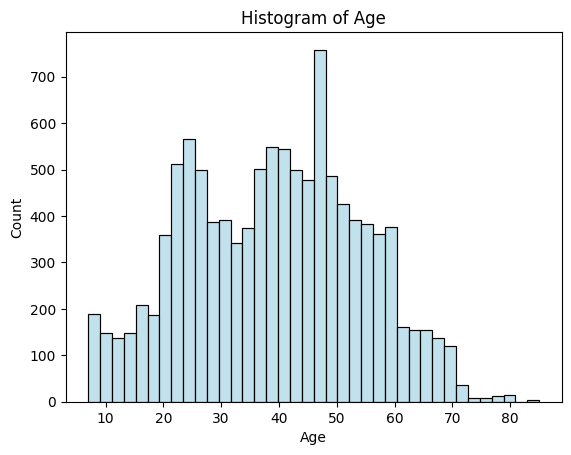

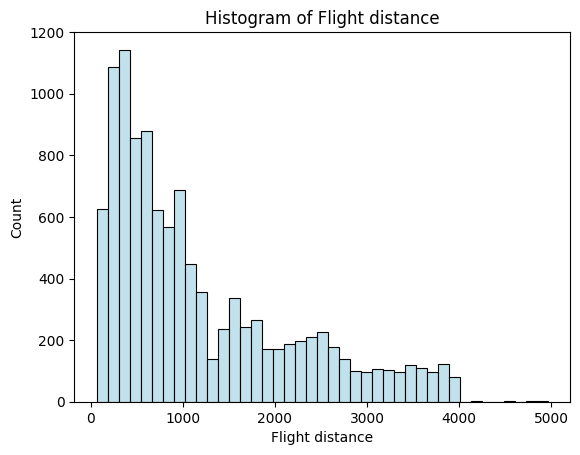

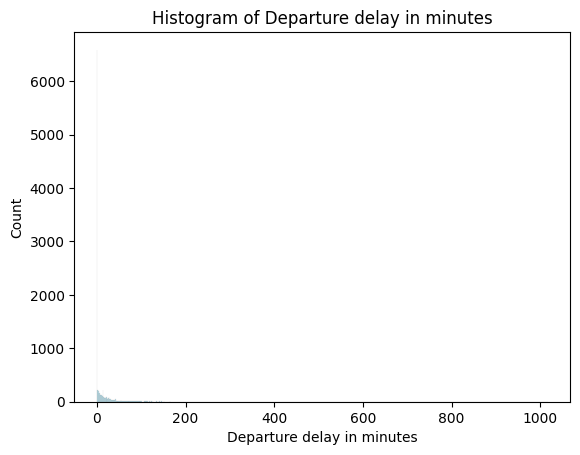

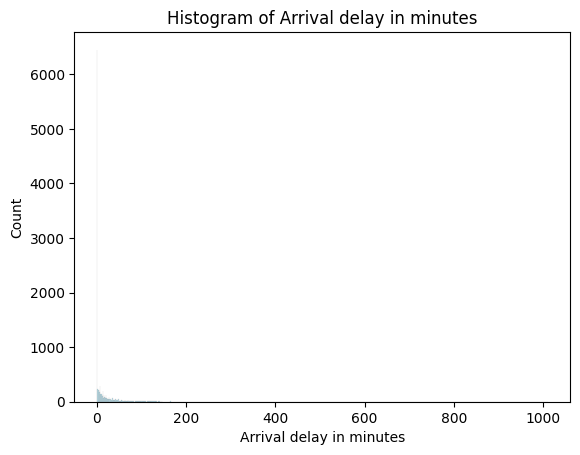

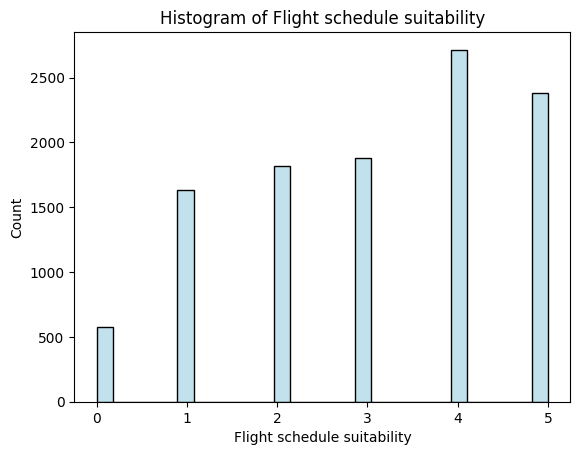

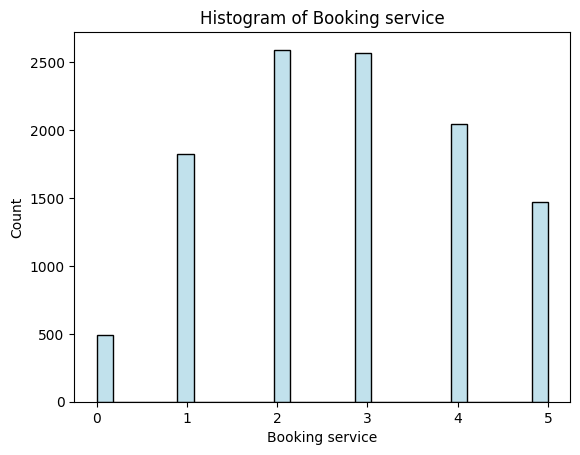

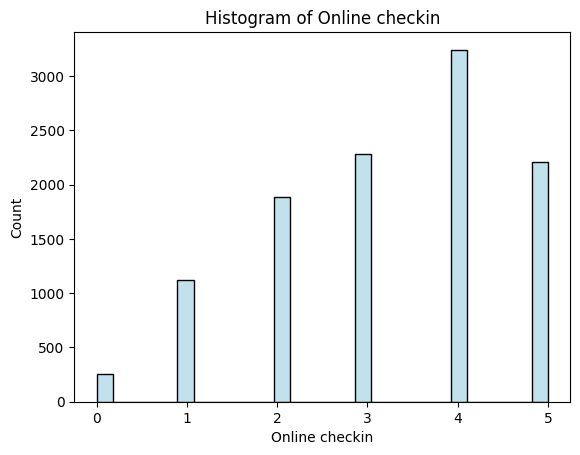

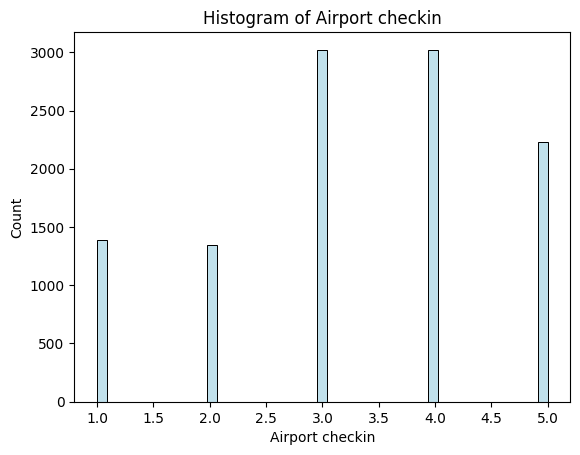

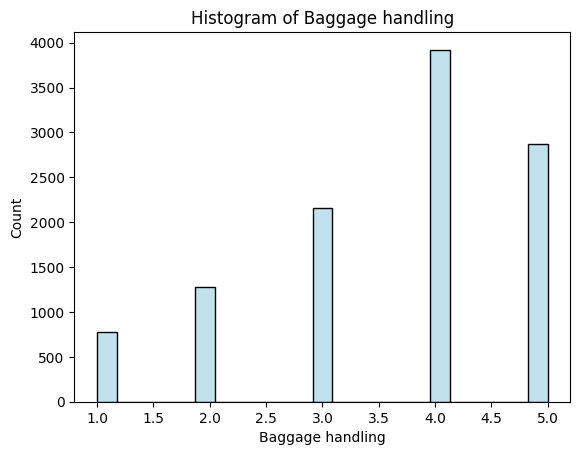

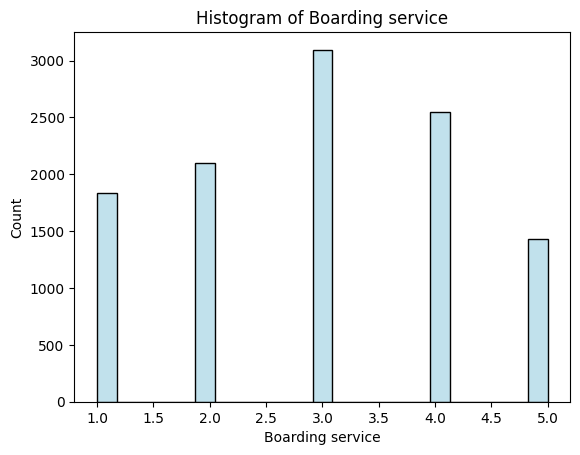

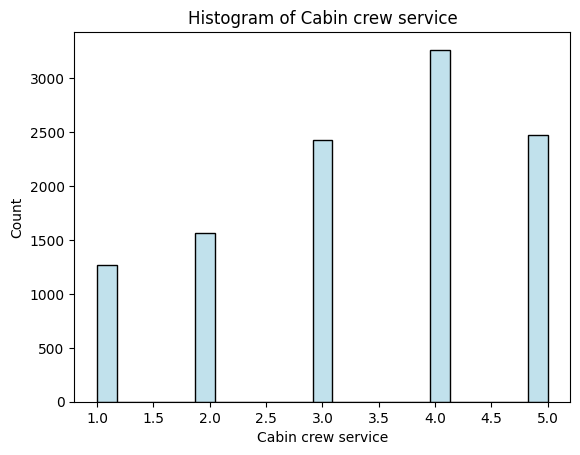

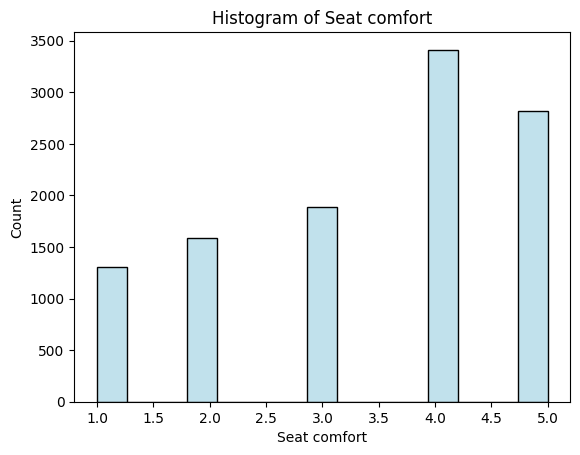

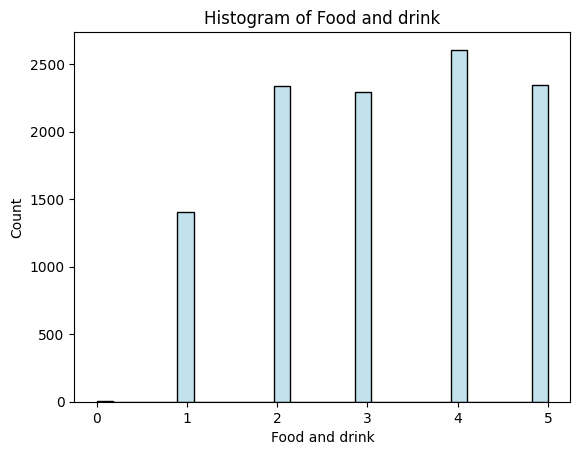

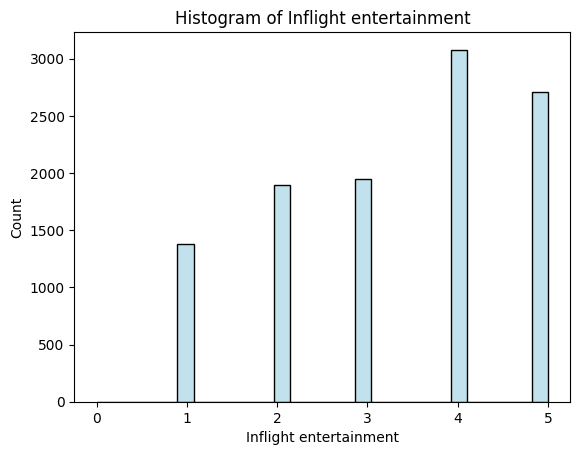

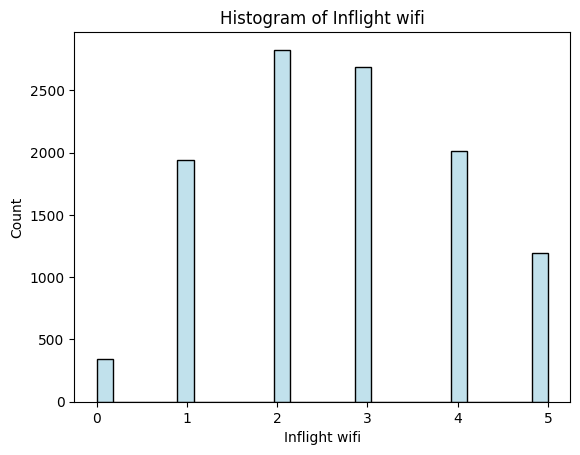

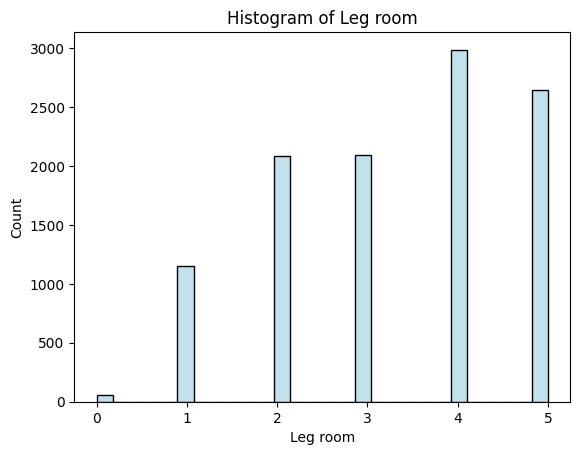

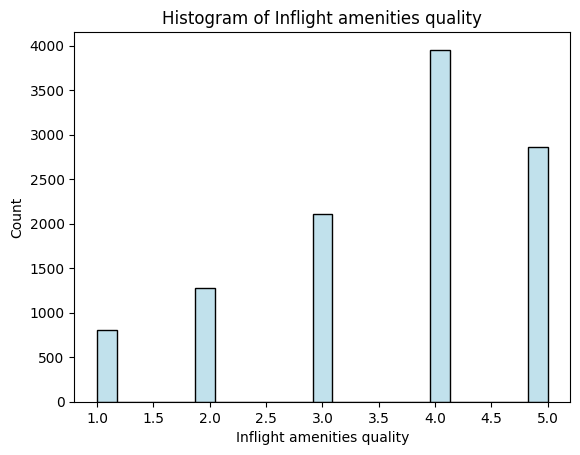

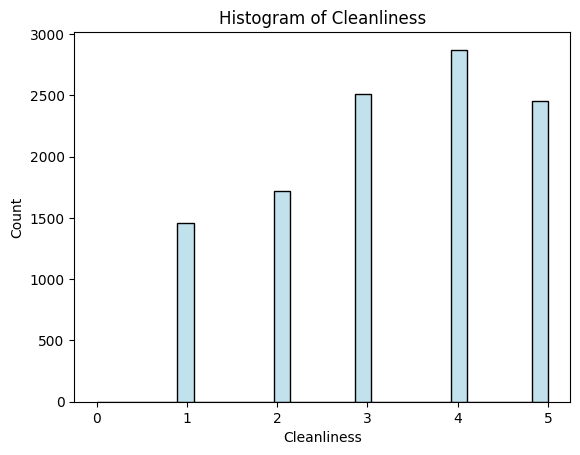

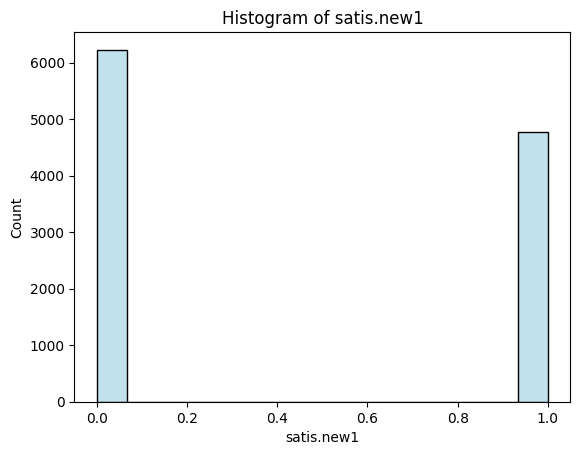

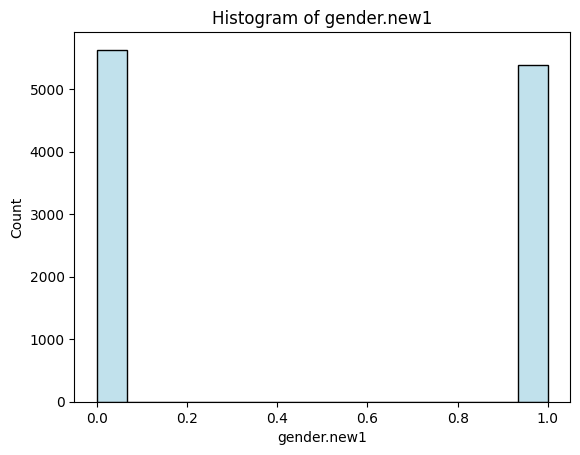

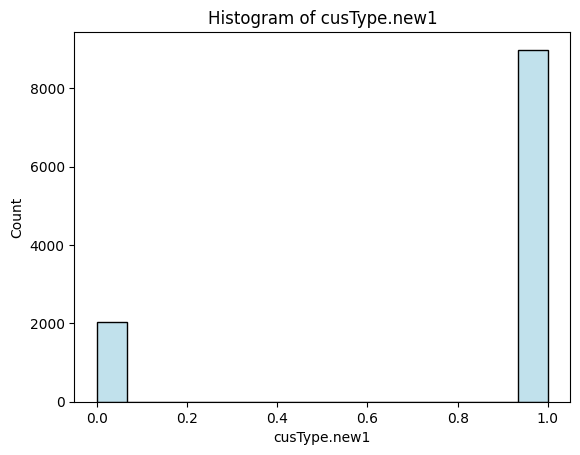

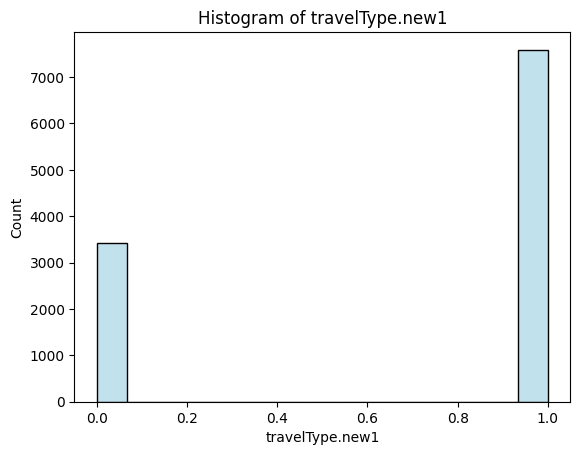

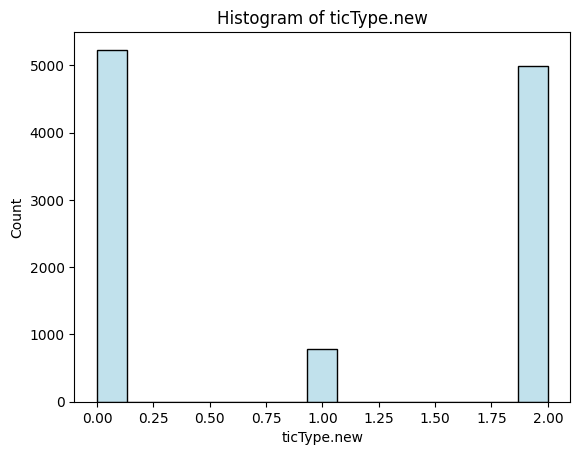

In [20]:
# Get the numerical variables from the dataset
numerical_variables = Ass1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=Ass1, x=variable, color='lightblue')
    plt.title(f"Histogram of {variable}")
    plt.show()

Numerical Variables: ['Age', 'Flight distance', 'Departure delay in minutes', 'Arrival delay in minutes', 'Flight schedule suitability', 'Booking service', 'Online checkin', 'Airport checkin', 'Baggage handling', 'Boarding service', 'Cabin crew service', 'Seat comfort', 'Food and drink', 'Inflight entertainment', 'Inflight wifi', 'Leg room', 'Inflight amenities quality', 'Cleanliness', 'satis.new1', 'gender.new1', 'cusType.new1', 'travelType.new1', 'ticType.new']


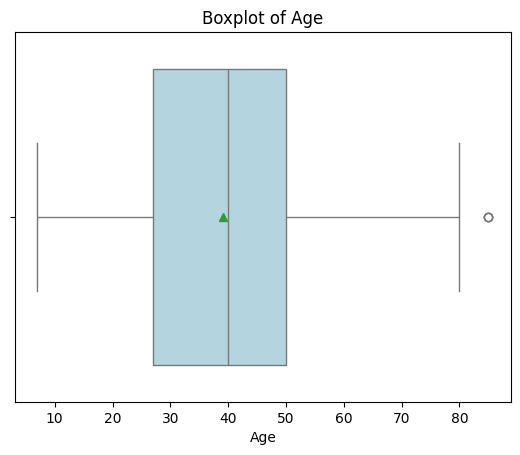

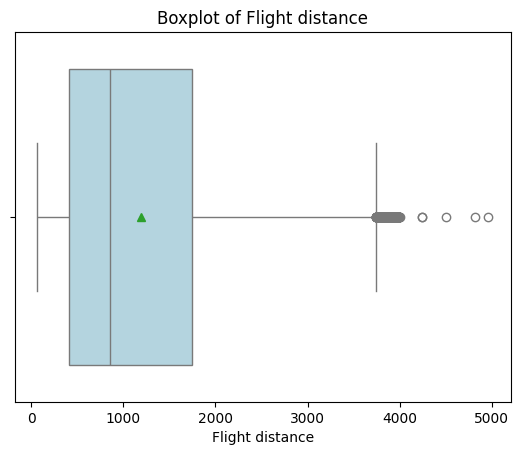

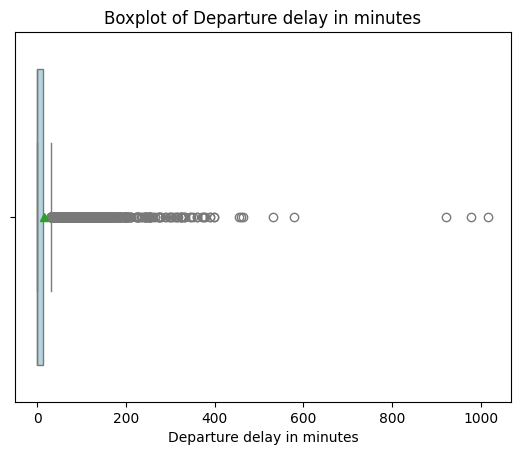

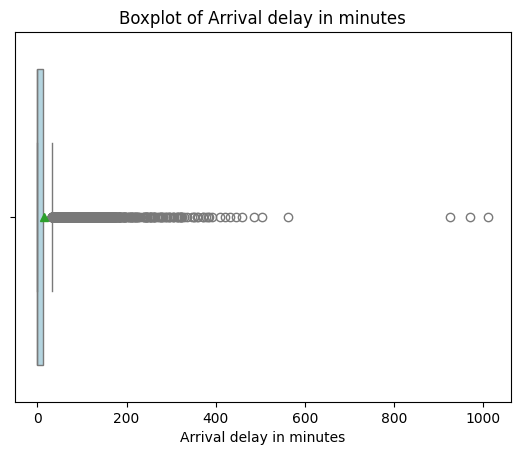

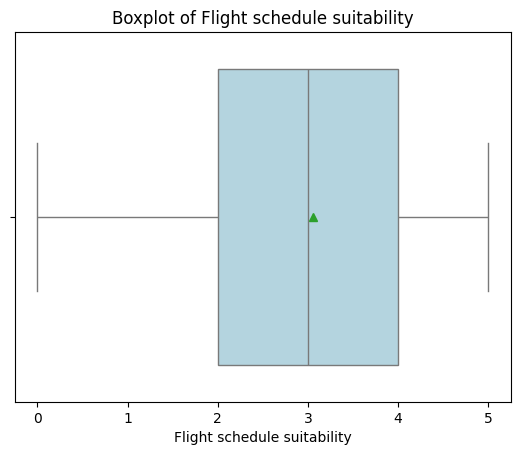

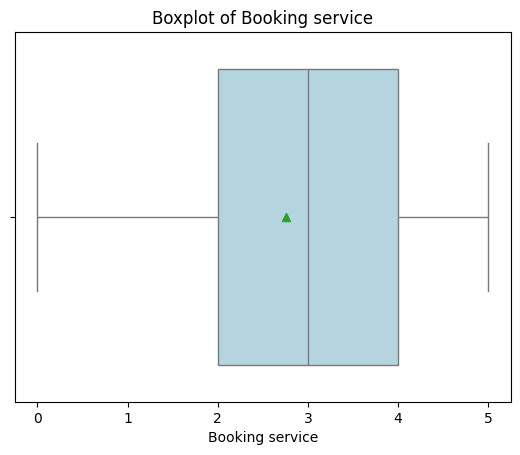

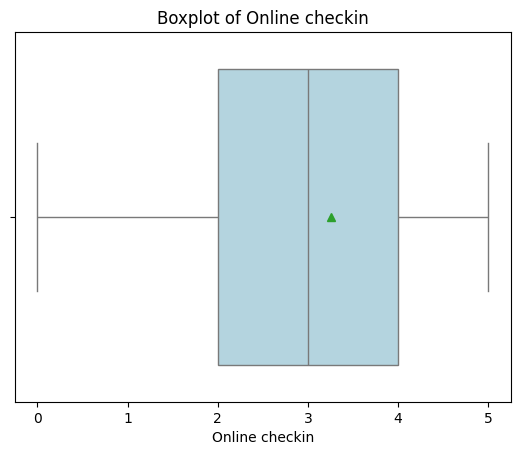

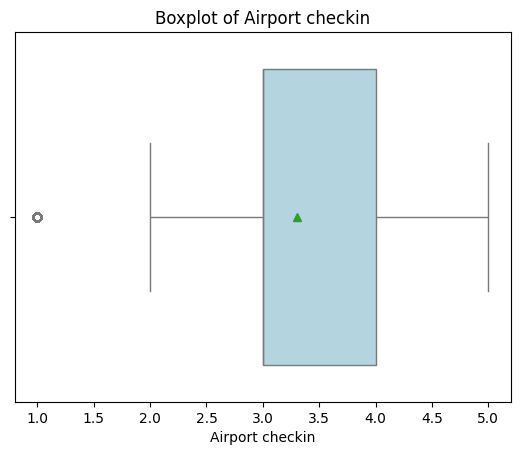

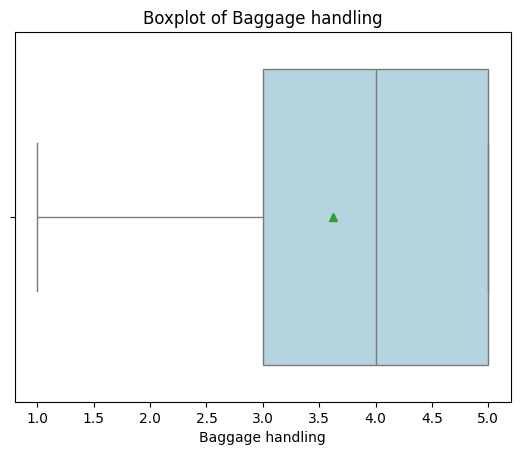

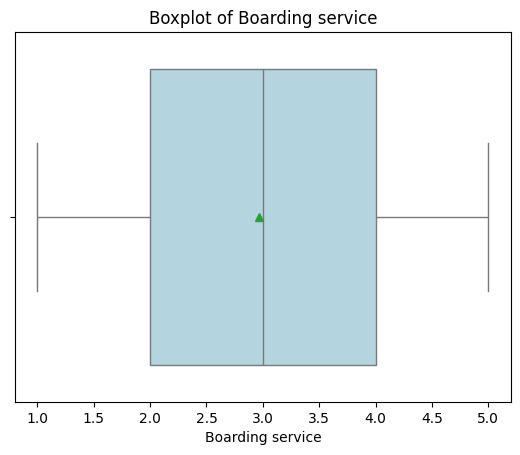

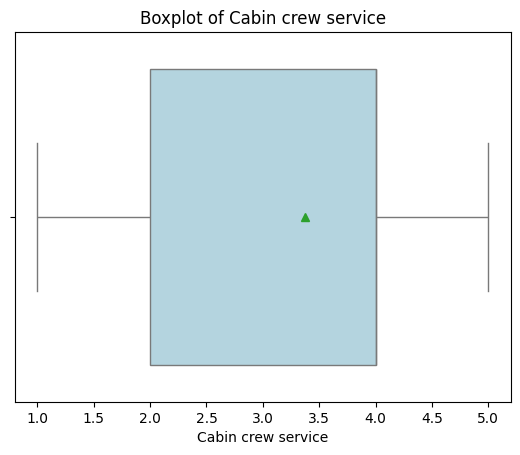

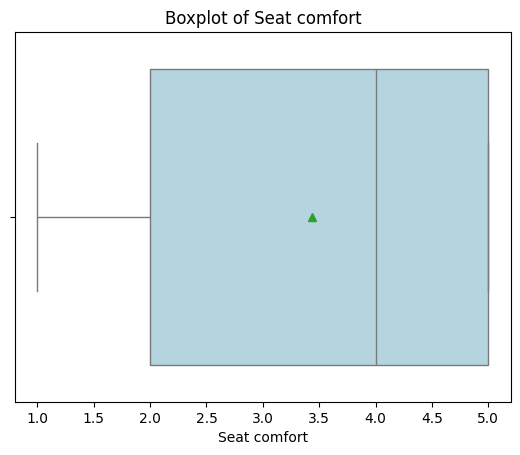

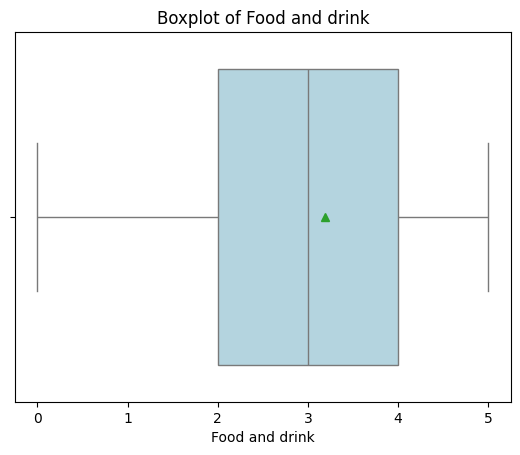

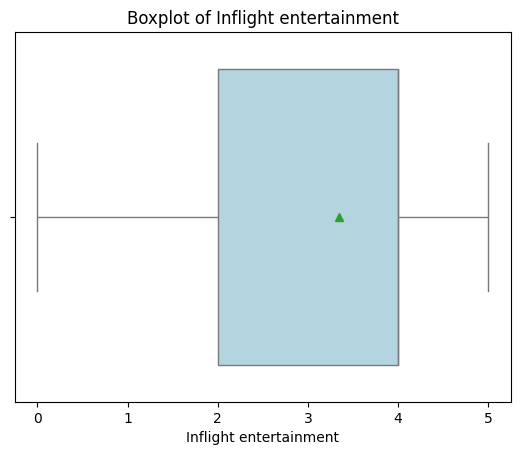

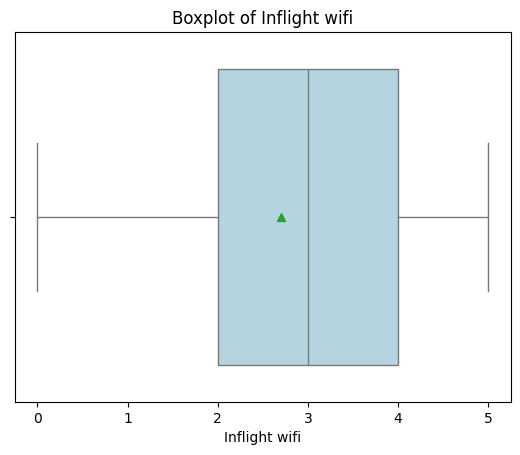

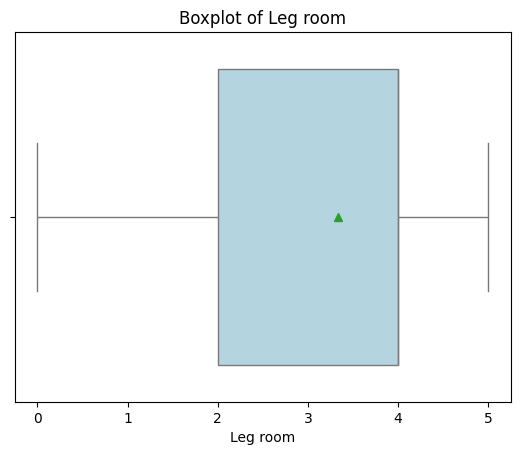

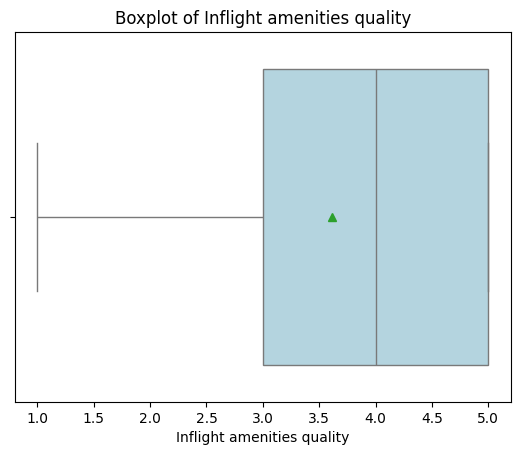

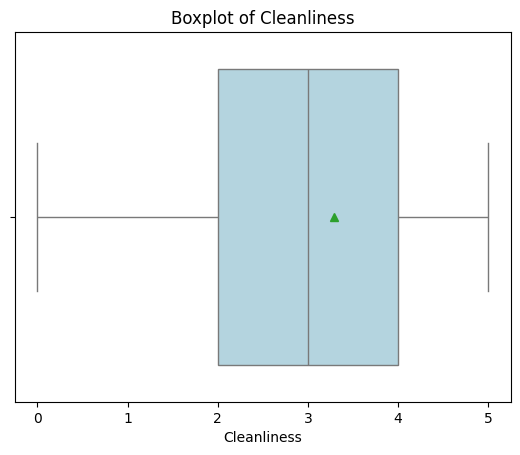

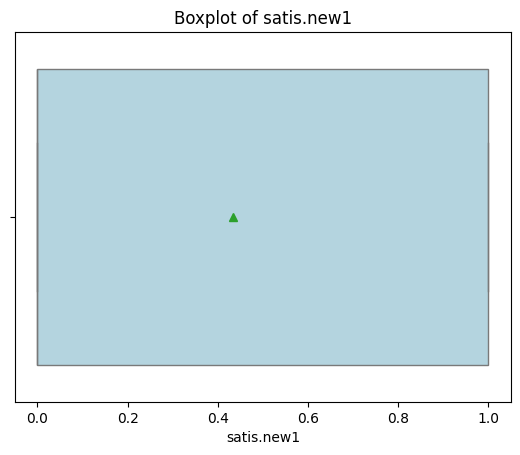

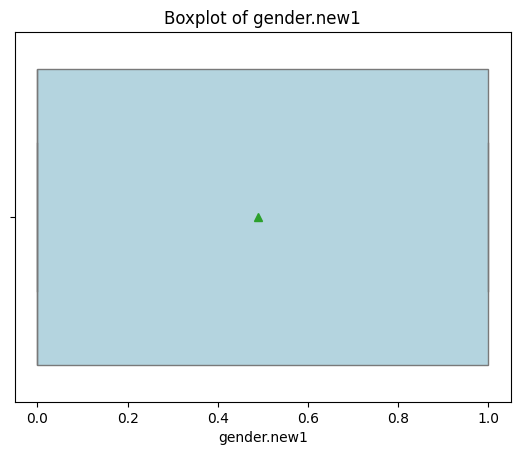

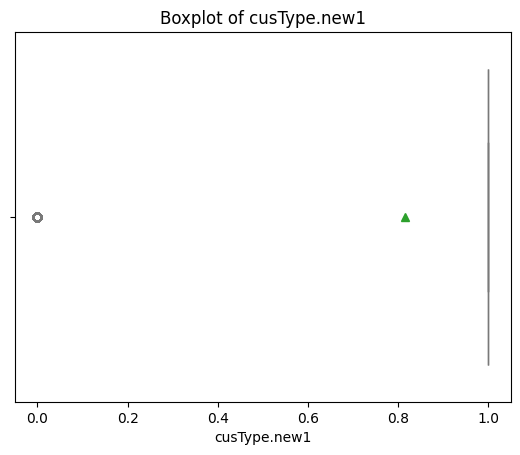

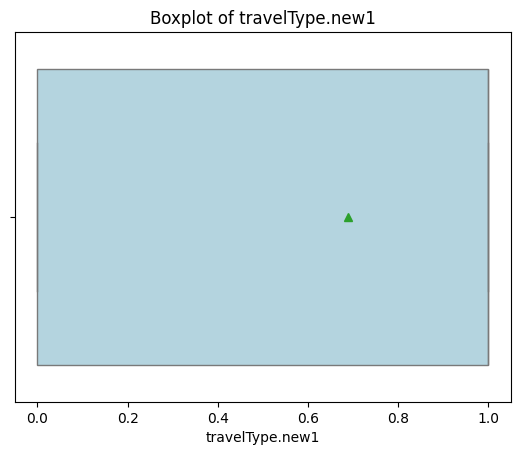

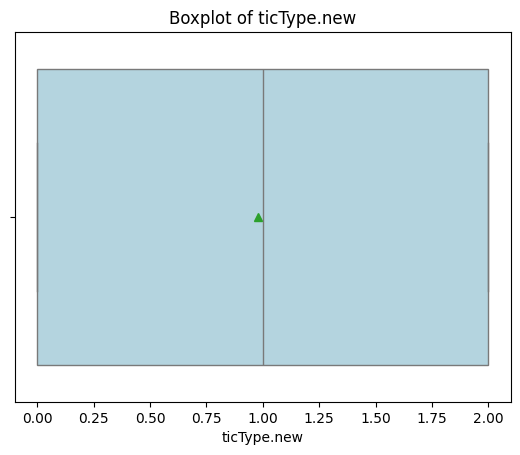

In [21]:
# Get the numerical variables from the dataset
numerical_variables = Ass1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display boxplot
for variable in numerical_variables:
    sns.boxplot(data=Ass1, x=variable, color='lightblue', showmeans = True)
    plt.title(f"Boxplot of {variable}")
    plt.show()

In [22]:
#explore each categorial variable
print(Ass1['Satisfaction'].value_counts())
print(Ass1['Satisfaction'].mode()[0])

Satisfaction
neutral or dissatisfied    6230
satisfied                  4776
Name: count, dtype: int64
neutral or dissatisfied


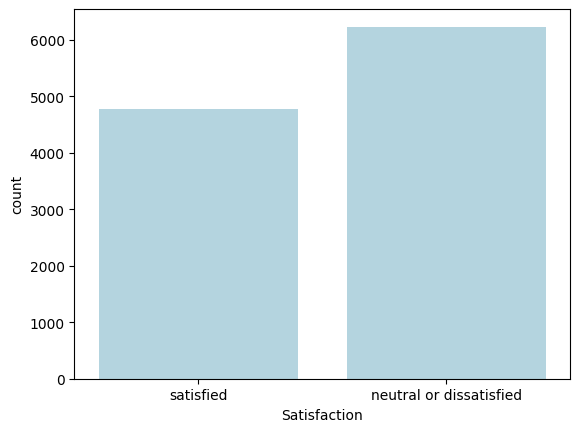

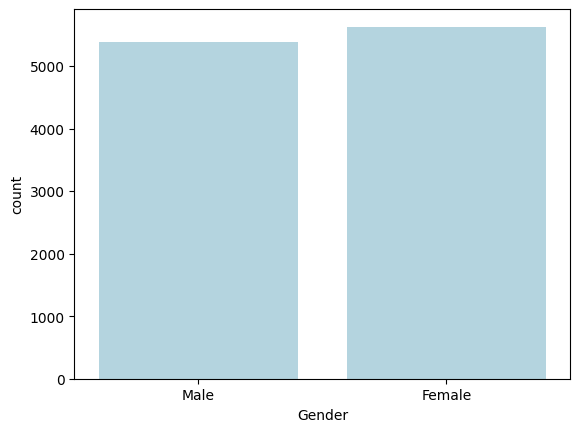

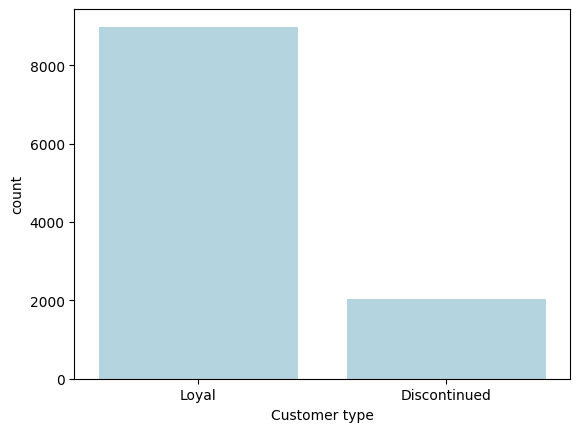

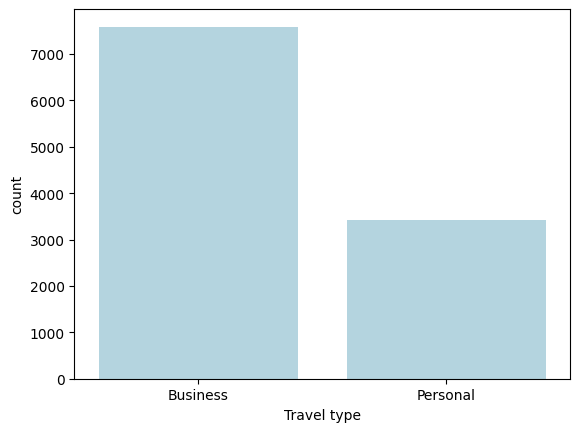

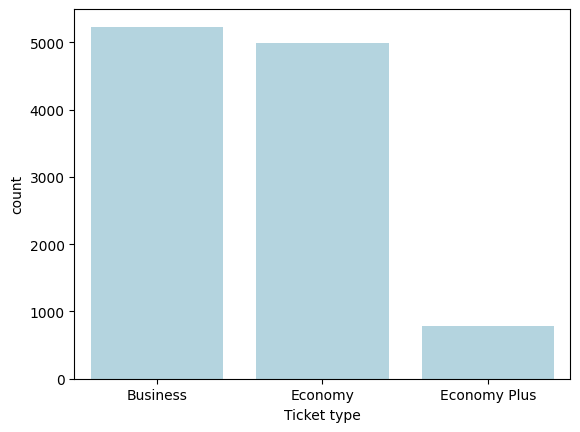

In [23]:
cat_variables = ['Satisfaction', 'Gender','Customer type', 'Travel type','Ticket type']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=Ass1[i], color = 'lightblue')

<Axes: >

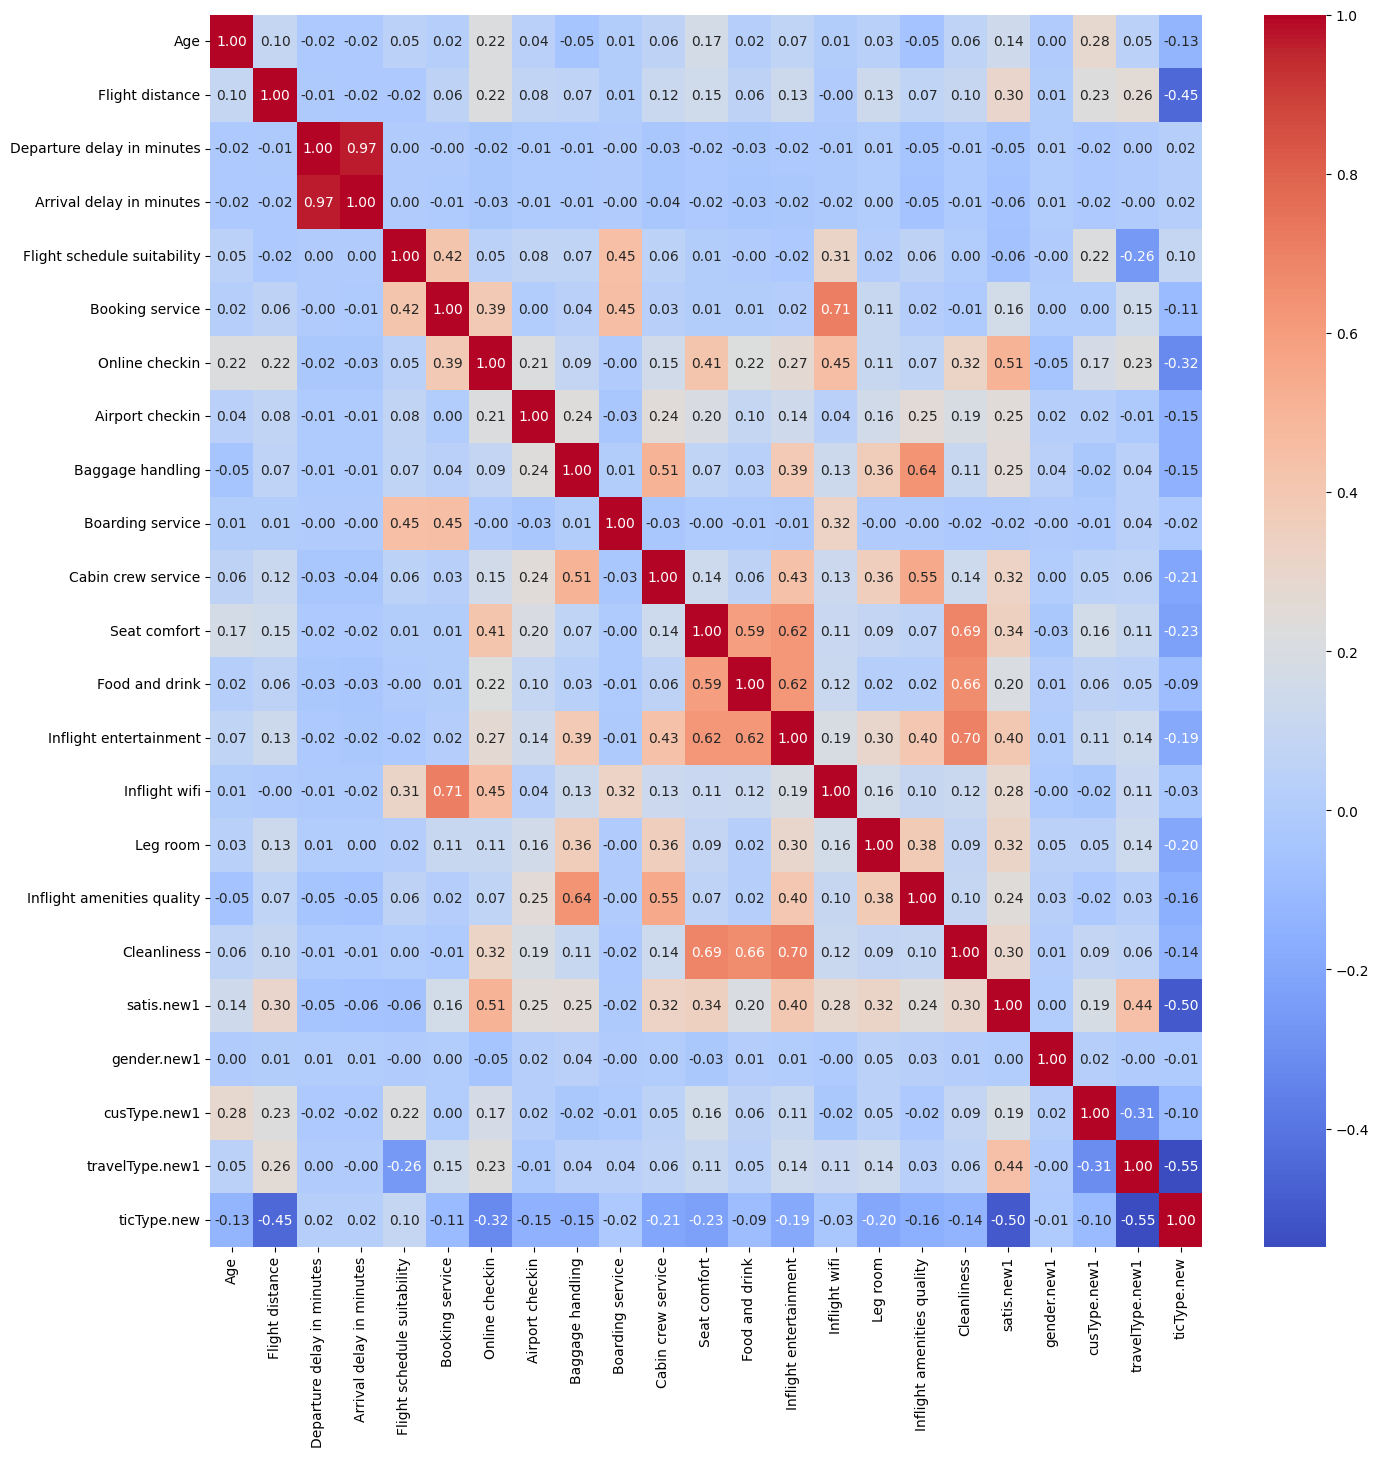

In [27]:
##write your code to create a heatmap using cmap='Blues' and annot=True. Hint: using data=records.corr()
plt.figure(figsize=(16,16))
sns.heatmap(data=Ass1[numerical_variables].corr(),  cmap='coolwarm', annot=True, fmt=".2f")

<Axes: xlabel='Online checkin', ylabel='Satisfaction'>

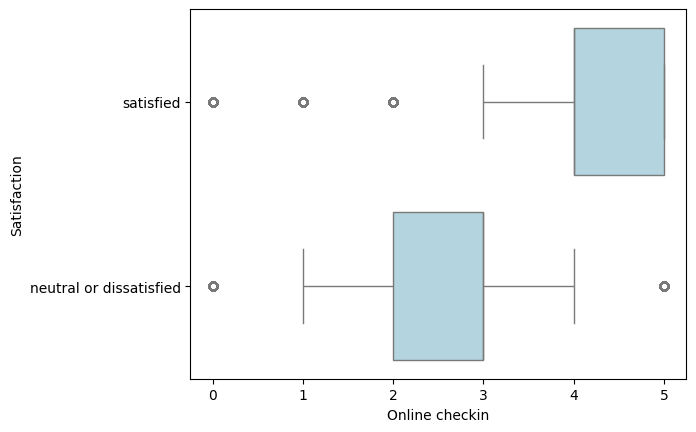

In [28]:
sns.boxplot(data=Ass1, x='Online checkin', y='Satisfaction', color='lightblue')

<Axes: xlabel='Inflight entertainment', ylabel='Satisfaction'>

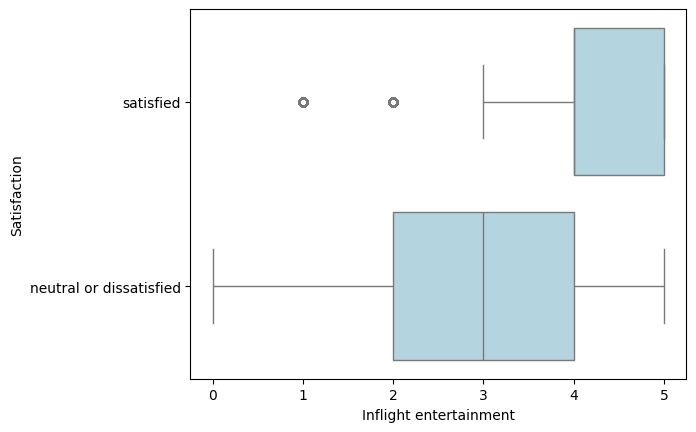

In [29]:
sns.boxplot(data=Ass1, x='Inflight entertainment', y='Satisfaction', color='lightblue')

<ipython-input-30-2ec3ec96ffc4>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sns.countplot(data=Ass1, x='Travel type', hue='Satisfaction', color='lightblue')


<Axes: xlabel='Travel type', ylabel='count'>

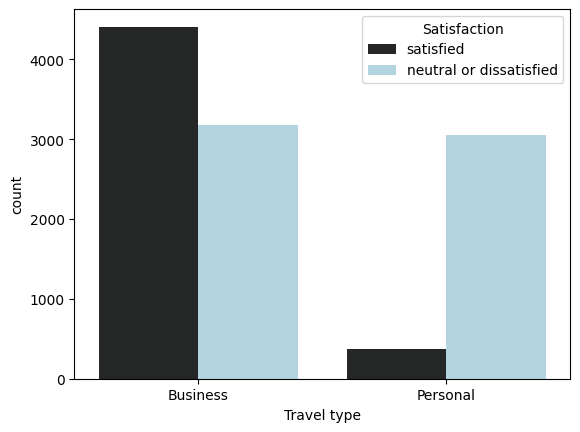

In [30]:
sns.countplot(data=Ass1, x='Travel type', hue='Satisfaction', color='lightblue')

<ipython-input-31-ddbaa945a0bb>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sns.countplot(data=Ass1, x='Ticket type', hue='Satisfaction', color='lightblue')


<Axes: xlabel='Ticket type', ylabel='count'>

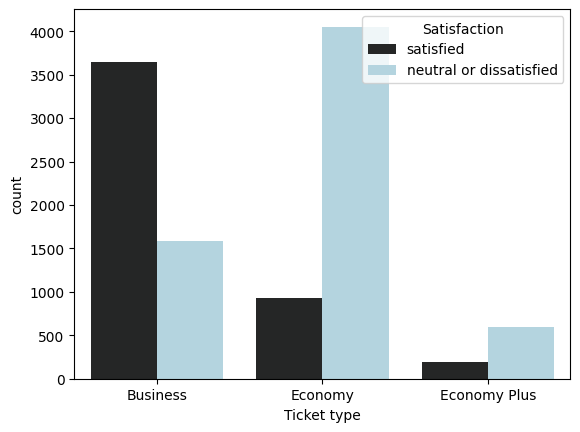

In [31]:
sns.countplot(data=Ass1, x='Ticket type', hue='Satisfaction', color='lightblue')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


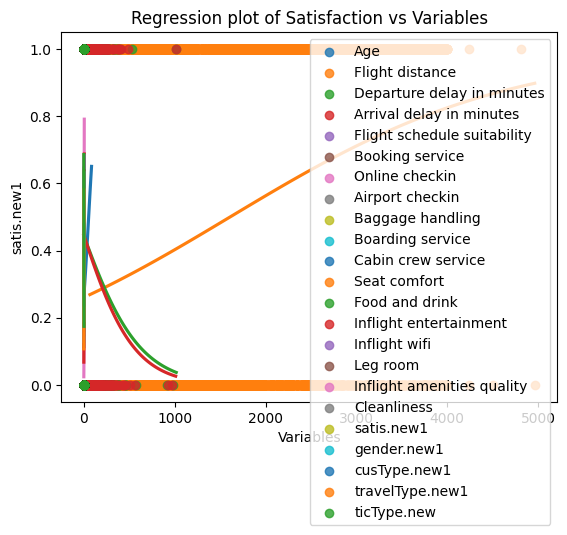

In [32]:
# Do it for other variables
for i in numerical_variables:
    sns.regplot(data=Ass1, x=i, y=Ass1['satis.new1'], logistic=True, ci=None, label=i)

plt.xlabel('Variables')  # Set x-axis label
plt.ylabel('satis.new1')  # Set y-axis label
plt.title('Regression plot of Satisfaction vs Variables')  # Set title
plt.legend()  # Display legend
plt.show()  # Display the plot

<a id = "cell_modeling"></a>
## 3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

In [33]:
# Selecting predictors
model = ['Online checkin', 'Cabin crew service', 'Seat comfort', 'Inflight entertainment', 'Leg room', 'travelType.new1']

# Specify X and y
X = Ass1[model]
y = Ass1['satis.new1']


In [34]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)  # 80% training and 20% testing


In [35]:
# Inspect the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 9208 to 4593
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Online checkin          8804 non-null   int64
 1   Cabin crew service      8804 non-null   int64
 2   Seat comfort            8804 non-null   int64
 3   Inflight entertainment  8804 non-null   int64
 4   Leg room                8804 non-null   int64
 5   travelType.new1         8804 non-null   int64
dtypes: int64(6)
memory usage: 481.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 7411 to 1975
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Online checkin          2202 non-null   int64
 1   Cabin crew service      2202 non-null   int64
 2   Seat comfort            2202 non-null   int64
 3   Inflight entertainment  2202 non-null   int64
 4   Leg room                2202

In [36]:
# Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

In [37]:
# Complete the code to train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train, y_train)

In [38]:
# Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)

In [39]:
# Join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

# Join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

,Online checkin,Cabin crew service,Seat comfort,Inflight entertainment,Leg room,travelType.new1,Actual,Predicted
7411,4,4,4,4,3,1,0,1
3954,5,1,4,4,4,0,0,0
9731,3,4,4,4,4,1,1,1
6751,3,3,5,3,3,0,0,0
7682,1,3,1,1,5,0,0,0
558,1,5,2,3,2,0,0,0
2151,3,3,4,3,1,0,0,0
10725,3,1,3,3,3,1,1,0
3164,4,4,5,4,4,1,1,1
3468,5,4,4,4,4,1,1,1


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, discuss/compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


In [40]:
# Call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))



Accuracy:  0.851952770208901
Precision:  0.8379828326180258
Recall:  0.8169456066945606
F1:  0.8273305084745763


In [41]:
# Print confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1095  151]
 [ 175  781]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1246
           1       0.84      0.82      0.83       956

    accuracy                           0.85      2202
   macro avg       0.85      0.85      0.85      2202
weighted avg       0.85      0.85      0.85      2202



In [42]:
# First get the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test)

In [43]:
# Now get the probabilities for the positive class (Cancer)
y_prob = probabilities[:, 1]

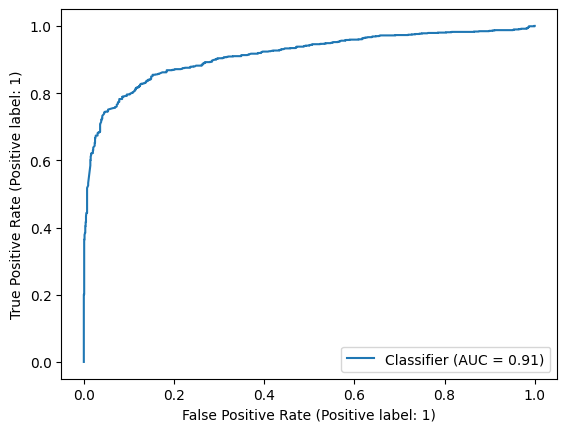

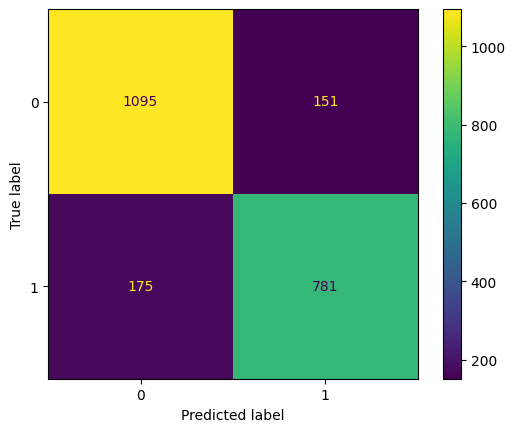

In [44]:
# Import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

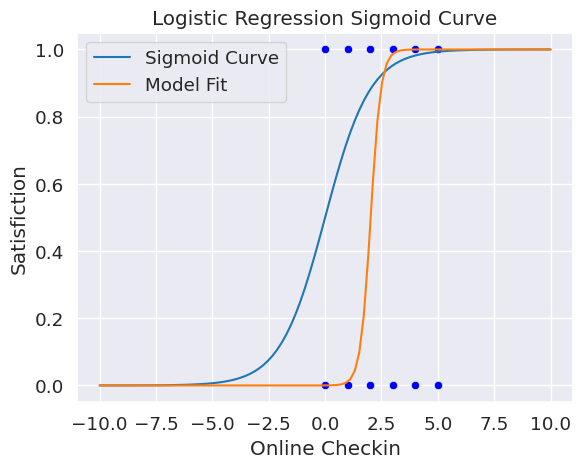

In [46]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_
y_vals = sigmoid(np.dot(X_test, coef) + intercept)

# Plot the sigmoid curve using seaborn, for Online checkin
sns.lineplot(x=x_vals, y=sigmoid(x_vals), label='Sigmoid Curve')
sns.lineplot(x=x_vals, y=sigmoid(np.dot(np.column_stack(([x_vals]*6)), coef) + intercept), label='Model Fit')
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)
sns.scatterplot(x=X_test['Online checkin'], y=y_test, color='blue')
plt.xlabel('Online Checkin')
plt.ylabel('Satisfiction')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()

Axes(0.125,0.11;0.775x0.77)


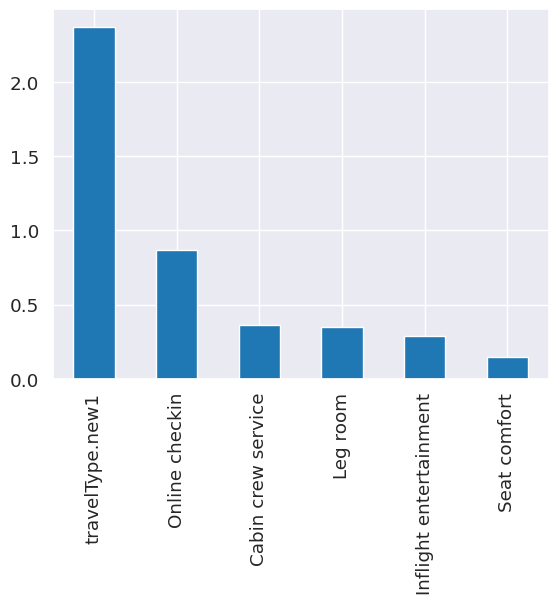

In [47]:
# Visualise the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))

In [48]:
print (coefs.sort_values(ascending = False))

travelType.new1          2.373
Online checkin           0.867
Cabin crew service       0.364
Leg room                 0.351
Inflight entertainment   0.290
Seat comfort             0.144
dtype: float64


In [49]:
# Print the model formula
coef = [2.373, 0.867, 0.364, 0.351, 0.290, 0.144]

print('Satisfaction =', '%.3f' % intercept, '+',
      '%.3f' % coef[0], '* TravelType_New', '+',
      '%.3f' % coef[1], '* Online checkin', '+',
      '%.3f' % coef[2], '* Cabin crew service', '+',
      '%.3f' % coef[3], '* Leg room', '+',
      '%.3f' % coef[4], '* Inflight entertainment', '+',
      '%.3f' % coef[5], '* Seat comfort')

Satisfaction = -8.867 + 2.373 * TravelType_New + 0.867 * Online checkin + 0.364 * Cabin crew service + 0.351 * Leg room + 0.290 * nflight entertainment + 0.144 * Seat comfort


<ipython-input-49-f07da118047b>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Satisfaction =', '%.3f' % intercept, '+',


## 5. Competition (optional)

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To (optionally) participate in the competetion.

_Use this section to report the deployment of the model on the unseen dataset. To ensure that the training and deployment datasets have similar features, it is important to preprocess the data in a consistent manner. This includes applying the same data preprocessing steps to both the training and deployment datasets. For example, if you are scaling the features in the training dataset, you should also scale the features in the deployment dataset using the same scaling method and parameters._

_Apply the trained model to predict the label for the deployment dataset and submit the result (inspection dataframe) as a csv file with you assessment._




In [ ]:
import pandas as pd

In [ ]:
#read the the competition dataset


In [ ]:
# Apply data transformation to the competition data,
# ensure number of features and transformation of X and X_competion are similar

# Apply trained model to X_competition
# y_competition = model(X_compeition)

#
# join unseen y_competition with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_competition})

# join X_competition with the new dataframe
inspection = pd.concat([X_competition, inspection], axis=1)

# Submit this results.csv file to join the competition, for example
inspection.to_csv('Competition_pred.csv')